# IMPORTING LIBRAIRES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
%matplotlib inline

# loading the dataset

In [2]:
data = pd.read_csv("Dataset/training_data.csv")

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
data.shape

(31962, 3)

In [5]:
data.size

95886

In [6]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64



# DATA PREPROCESSING

# Cleaning the data

In [9]:
# removing handle names
def remove_handle(tweet):
    match = re.findall("@[\w]*",tweet)
    for i in match:
        tweet = re.sub(i,'',tweet)
    return tweet

In [10]:
vector = np.vectorize(remove_handle)

In [11]:
data['tweets without handle'] = vector(data['tweet'])

In [12]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


# Removing punctuation's,numbers and symbols

In [13]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [14]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [15]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [16]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [17]:
#tokenize the words
tokenized_tweets = data['tweets without handle'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweets without handle, dtype: object

In [18]:
#sTEMMING THE WORDS
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x : [ps.stem(word) for word in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweets without handle, dtype: object

In [19]:
#TOKENIZED THE WORD
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
data['tweets without handle'] = tokenized_tweets
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [20]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn
31961,31962,0,thank you @user for you follow,thank follow


# DATA VISUALIZATION

# Using word cloud

In [21]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [22]:
allpositive = ' '.join(text for text in data['tweets without handle'][data['label']==0])

In [23]:
allpositive

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl blame conced goal rooney gave away free kick know bale them from there littl dude #badday #coneofsham #cat #piss #funni #laugh product happi #wine tool #week

In [24]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(allpositive)

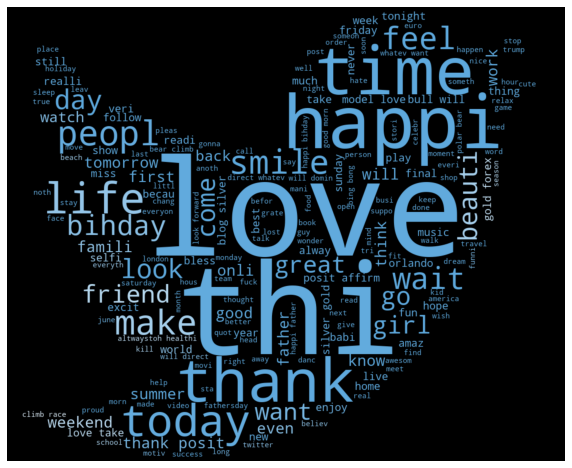

In [25]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [26]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/newhp/iron-spiderman-clipart-spiderman-png-marvel-avengers-assemble-iron-man-full-body-115629484241slwjnw2ei.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(allpositive)

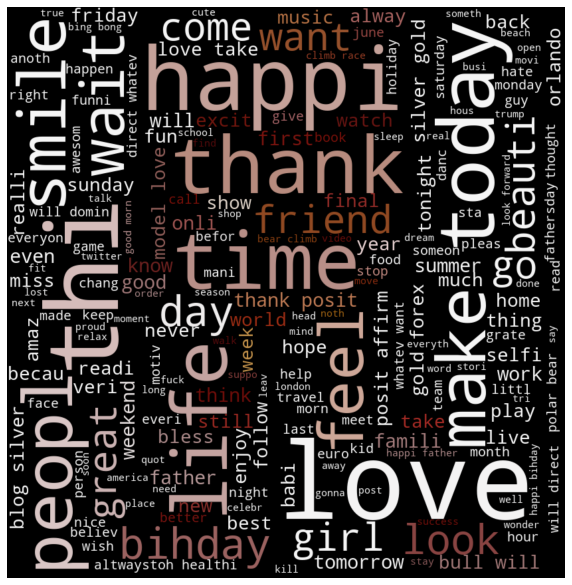

In [27]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

# Plotting Bar Plot for positive words

In [28]:
def extract_hashtags(x):
    hastags = []
    for i in x:
        hastags.append(re.findall(r"#(\w+)",i))
    return hastags                       

In [29]:
positive_tweets = extract_hashtags(data['tweets without handle'][data['label']==0])

In [30]:
len(positive_tweets)

29720

In [31]:
u_positive_tweets = sum(positive_tweets,[])

In [32]:
postive_freq = nltk.FreqDist(u_positive_tweets)

In [33]:
postive_freq

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [34]:
positive_df = pd.DataFrame({'Hashtags':list(postive_freq.keys()),'Counts':list(postive_freq.values())})

In [35]:
positive_df

,Hashtags,Counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


In [36]:
top_positive = positive_df.nlargest(30,columns = 'Counts')

In [37]:
top_positive.head()

,Hashtags,Counts
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534


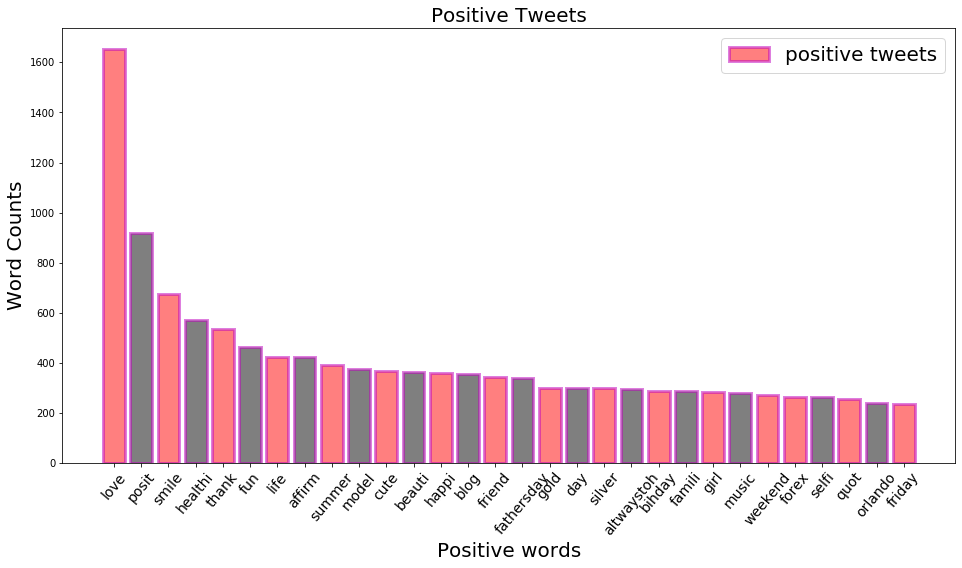

In [38]:
plt.figure(figsize=(16,8))
color=["r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r"]
plt.title("Positive Tweets",fontsize=20)
plt.bar(top_positive['Hashtags'],top_positive['Counts'],color=color,alpha=0.5 ,label="positive tweets",edgecolor="m",linewidth=3,linestyle="-")
plt.xlabel("Positive words",fontsize=20)
plt.ylabel("Word Counts",fontsize=20)
plt.xticks(rotation=50,fontsize=14)
plt.legend(fontsize=20)
plt.show()



# Plotting pie chart fro positive words

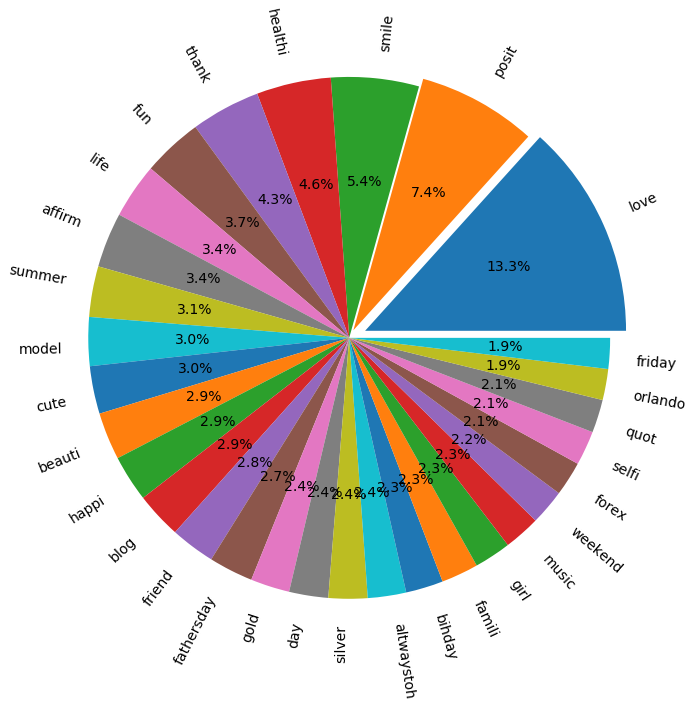

In [39]:
explode = np.zeros(30)
explode[0]=0.2
explode[1]=0.1
plt.pie(top_positive['Counts'],labels=top_positive['Hashtags'],autopct="%0.1f%%",explode=explode,radius=3,rotatelabels="true",textprops={"fontsize":14})
plt.show()

# Plotting bar plot for negative words

In [40]:
negative_tweets = extract_hashtags(data['tweets without handle'][data['label']==1])

In [41]:
len(negative_tweets)

2242

In [42]:
u_negative_tweets = sum(negative_tweets,[])

In [43]:
negative_freq = nltk.FreqDist(u_negative_tweets)

In [44]:
negative_df = pd.DataFrame({'Hashtags':list(negative_freq.keys()),'Counts':list(negative_freq.values())})

In [45]:
negative_df.head()

,Hashtags,Counts
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [46]:
top_neagtive = negative_df.nlargest(30,columns = 'Counts')

In [47]:
top_neagtive.head()

,Hashtags,Counts
22,trump,136
31,polit,95
63,allahsoil,92
30,liber,81
28,libtard,77


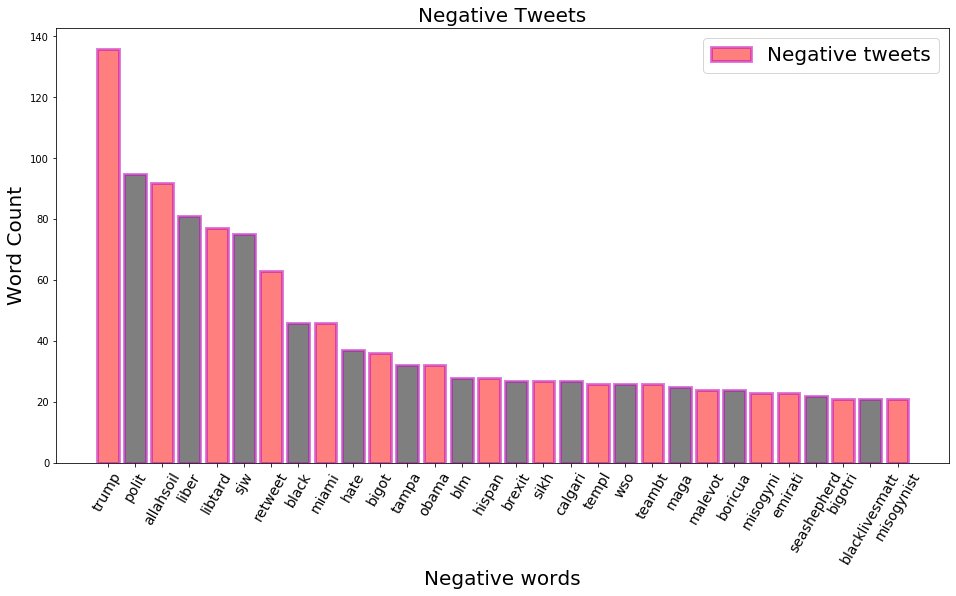

In [48]:
plt.figure(figsize=(16,8))
color=["r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r"]
plt.title("Negative Tweets",fontsize=20)
plt.bar(top_neagtive['Hashtags'],top_neagtive['Counts'],color=color,alpha=0.5 ,label="Negative tweets",edgecolor="m",linewidth=3,linestyle="-")
plt.xlabel("Negative words",fontsize=20)
plt.ylabel("Word Count",fontsize=20)
plt.xticks(rotation=60,fontsize=14)
plt.legend(fontsize=20)
plt.show()

# Plotting Pie chart for negative words

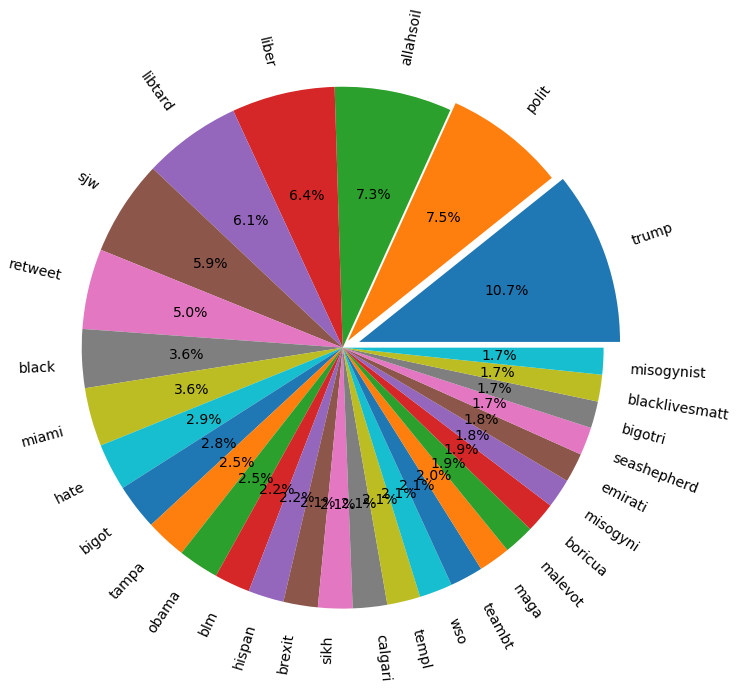

In [49]:
explode = np.zeros(30)
explode[0]=0.2
explode[1]=0.1
plt.pie(top_neagtive['Counts'],labels=top_neagtive['Hashtags'],autopct="%0.1f%%",explode=explode,radius=3,rotatelabels="true",textprops={"fontsize":14})
plt.show()

# Feature Extraction

# Using CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
vectorizer_bow = CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_bow = vectorizer_bow.fit_transform(data['tweets without handle']).toarray()

In [52]:
x_bow.shape

(31962, 6000)

In [53]:
y_bow = data['label']

In [54]:
y_bow.shape

(31962,)

In [55]:
from sklearn.model_selection import train_test_split
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow = train_test_split(x_bow,y_bow,test_size=0.2,random_state=3)

In [56]:
#checking features names
vectorizer_bow.get_feature_names()

['aap',
 'abandon',
 'abil',
 'abl',
 'abov',
 'abov expect',
 'abrahamhick',
 'abrahamhick lawofattract',
 'abrahamhick lawofattract healthi',
 'abrahamhick lawofattract healthi heal',
 'absolut',
 'abund',
 'abus',
 'academi',
 'accent',
 'accept',
 'accept sale',
 'accept sale photographi',
 'accept stoprac boycott',
 'access',
 'accessori',
 'accid',
 'accomplish',
 'accord',
 'account',
 'accus',
 'ace',
 'ach',
 'achiev',
 'acn',
 'acn altwaystoh',
 'acn altwaystoh healthi',
 'acn altwaystoh healthi heal',
 'act',
 'act like',
 'action',
 'activ',
 'activist',
 'actor',
 'actor seeklearn',
 'actor seeklearn stafresh',
 'actorslif',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'adapt environ',
 'adapt environ need',
 'adapt environ need tear',
 'add',
 'addict',
 'addit',
 'address',
 'adel',
 'adida',
 'admit',
 'adopt',
 'ador',
 'adrenalin',
 'adult',
 'adv',
 'advanc',
 'advantag',
 'adveis',
 'adventur',
 'advic',
 'advoc',
 'affair',
 'affect',
 'affirm',
 'afford',
 'a

In [57]:
vectorizer_bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [58]:
count_df = pd.DataFrame(x_bow,columns = vectorizer_bow.get_feature_names())

In [59]:
count_df.head()

,aap,abandon,abil,abl,abov,abov expect,abrahamhick,abrahamhick lawofattract,abrahamhick lawofattract healthi,abrahamhick lawofattract healthi heal,...,youtub youtub,yum,yummi,yyc,zara,zealand,zelda,zen,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# By TfidfVectorizer 

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tdif = TfidfVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))

In [61]:
x_tdif = vectorizer_tdif.fit_transform(data['tweets without handle'])

In [62]:
x_tdif = x_tdif.todense()
x_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
y_tdif=data['label']

In [64]:
y_tdif

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
xtrain_tdif,xtest_tdif,ytrain_tdif,ytest_tdif = train_test_split(x_tdif,y_tdif,test_size=0.2,random_state=3)

In [66]:
xtrain_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
xtrain_tdif.shape

(25569, 6000)

In [68]:
ytrain_tdif.shape

(25569,)

# Building model

# Multinomial Naive Bayes

# By using countvectorizer

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [71]:
nb.fit(xtrain_bow,ytrain_bow)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
ytest_nb_bow_pred = nb.predict(xtest_bow)

In [73]:
from sklearn import metrics

In [74]:
ytest_nb_bow_score = metrics.accuracy_score(ytest_bow,ytest_nb_bow_pred)

In [75]:
ytest_nb_bow_score*100

95.07273580478649

In [76]:
ytest_nb_bow_confusion_matrix = metrics.confusion_matrix(ytest_bow,ytest_nb_bow_pred)

In [77]:
ytest_nb_bow_confusion_matrix

array([[5778,  172],
       [ 143,  300]], dtype=int64)

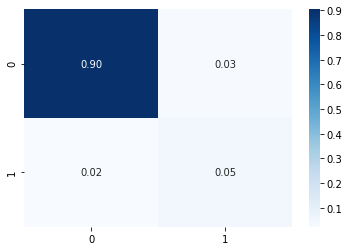

In [78]:
sns.heatmap(ytest_nb_bow_confusion_matrix/np.sum(ytest_nb_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

In [79]:
metrics.classification_report(ytest_bow,ytest_nb_bow_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97      5950\n           1       0.64      0.68      0.66       443\n\n    accuracy                           0.95      6393\n   macro avg       0.81      0.82      0.81      6393\nweighted avg       0.95      0.95      0.95      6393\n'

# By using tdidf-vector

In [80]:
nb.fit(xtrain_tdif,ytrain_tdif)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
ytest_nb_tdif_pred = nb.predict(xtest_tdif)

In [82]:
from sklearn import metrics

In [83]:
ytest_nb_tdif_score = metrics.accuracy_score(ytest_tdif,ytest_nb_tdif_pred)

In [84]:
ytest_nb_tdif_score*100

94.68168309088065

In [85]:
ytest_nb_tdif_confusion_matrix = metrics.confusion_matrix(ytest_tdif,ytest_nb_tdif_pred)

In [86]:
ytest_nb_tdif_confusion_matrix

array([[5909,   41],
       [ 299,  144]], dtype=int64)

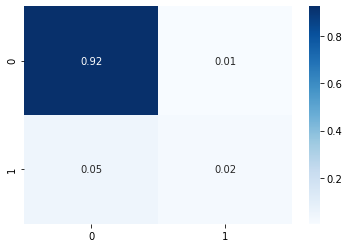

In [87]:
sns.heatmap(ytest_nb_tdif_confusion_matrix/np.sum(ytest_nb_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

In [88]:
metrics.classification_report(ytest_tdif,ytest_nb_tdif_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      5950\n           1       0.78      0.33      0.46       443\n\n    accuracy                           0.95      6393\n   macro avg       0.87      0.66      0.72      6393\nweighted avg       0.94      0.95      0.94      6393\n'

# LOGISTIC REGRESSION

# By using CountVectorizer

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression(random_state=0)

In [91]:
lr.fit(xtrain_bow,ytrain_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
ytest_lr_bow_pred = lr.predict(xtest_bow)

In [93]:
from sklearn import metrics

In [94]:
ytest_lr_bow_score = metrics.accuracy_score(ytest_bow,ytest_lr_bow_pred)

In [95]:
ytest_lr_bow_score*100

95.91740966682309

In [96]:
ytest_lr_bow_confusion_matrix = metrics.confusion_matrix(ytest_bow,ytest_lr_bow_pred)

In [97]:
ytest_lr_bow_confusion_matrix

array([[5904,   46],
       [ 215,  228]], dtype=int64)

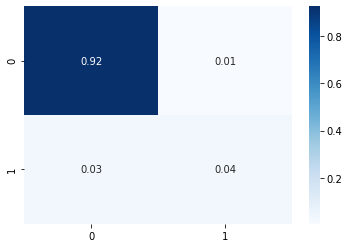

In [98]:
sns.heatmap(ytest_lr_bow_confusion_matrix/np.sum(ytest_lr_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

In [99]:
metrics.classification_report(ytest_bow,ytest_lr_bow_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98      5950\n           1       0.83      0.51      0.64       443\n\n    accuracy                           0.96      6393\n   macro avg       0.90      0.75      0.81      6393\nweighted avg       0.96      0.96      0.95      6393\n'

# By using tdidf vector

In [104]:
lr.fit(xtrain_tdif,ytrain_tdif)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
ytest_lr_tdif_pred = lr.predict(xtest_tdif)

In [106]:
from sklearn import metrics

In [107]:
ytest_lr_tdif_score = metrics.accuracy_score(ytest_tdif,ytest_lr_tdif_pred)

In [109]:
ytest_lr_tdif_score*100

95.29172532457375

In [110]:
ytest_lr_tdif_confusion_matrix = metrics.confusion_matrix(ytest_tdif,ytest_lr_tdif_pred)

In [111]:
ytest_lr_tdif_confusion_matrix

array([[5933,   17],
       [ 284,  159]], dtype=int64)

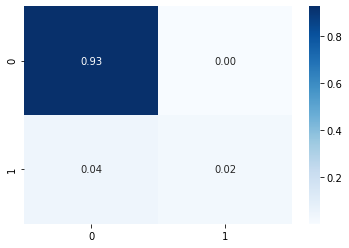

In [112]:
sns.heatmap(ytest_lr_tdif_confusion_matrix/np.sum(ytest_lr_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

In [113]:
metrics.classification_report(ytest_tdif,ytest_lr_tdif_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.98      5950\n           1       0.90      0.36      0.51       443\n\n    accuracy                           0.95      6393\n   macro avg       0.93      0.68      0.74      6393\nweighted avg       0.95      0.95      0.94      6393\n'

# K Nearest Neighbors

# Using Count Vectorizer

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
neighbors=KNeighborsClassifier(n_neighbors=1)

In [38]:
neighbors.fit(xtrain_bow,ytrain_bow)

KNeighborsClassifier(n_neighbors=1)

In [39]:
pred_y_bow=neighbors.predict(xtest_bow)

In [40]:
from sklearn import metrics
count_accuracy_score=metrics.accuracy_score(ytest_bow,pred_y_bow)

In [41]:
print(count_accuracy_score*100)

93.85265133740029


we cannot take the value of k to be 1 because there is a possibilty that the point which is nearest to the point to be predicted might be just a noisy value or an outliner therefore we will search for the value of k where there will be minimum error

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error=[]
for i in range(1,10,2):
    neighbors=KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(xtrain_bow,ytrain_bow)
    pred_i=neighbors.predict(xtest_bow)
    error.append(np.mean(pred_i!=ytest_bow))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# we found that the minimum error is found where value of k=3 

In [43]:
neighbour=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_bow,ytrain_bow)
pred_y_bow=neighbors.predict(xtest_bow)

In [44]:
from sklearn import metrics
count_accuracy_score=metrics.accuracy_score(ytest_bow,pred_y_bow)

In [45]:
print(count_accuracy_score*100)

93.85265133740029


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(ytest_bow,pred_y_bow))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5950
           1       0.57      0.47      0.52       443

    accuracy                           0.94      6393
   macro avg       0.76      0.72      0.74      6393
weighted avg       0.93      0.94      0.94      6393



In [49]:
ytest_count_vector_confusion_matrix=metrics.confusion_matrix(ytest_bow,pred_y_bow)

In [50]:
ytest_count_vector_confusion_matrix

array([[5790,  160],
       [ 233,  210]], dtype=int64)

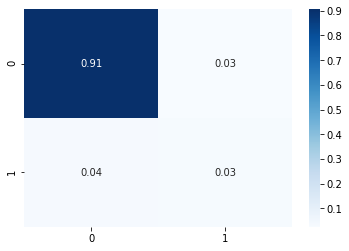

In [51]:
import seaborn as sns
sns.heatmap(ytest_count_vector_confusion_matrix/np.sum(ytest_count_vector_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Using TFIDF 

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
neighbors_tfidf=KNeighborsClassifier(n_neighbors=1)

In [54]:
neighbors_tfidf.fit(xtrain_tdif,ytrain_tdif)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred_y_tfidf=neighbors_tfidf.predict(xtest_tdif)

In [56]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,pred_y_tfidf)
print(accuracy_score_tfidf*100)

94.46269357109338


In [ ]:
error=[]
for i in range(1,10,2):
    neighbors_tfidf=KNeighborsClassifier(n_neighbors=i)
    neighbors_tfidf.fit(xtrain_tdif,ytrain_tdif)
    pred_y_tfidf=neighbors_tfidf.predict(xtest_tdif)
    error.append(np.mean(pred_y_tfidf!=ytest_tdif))

In [ ]:
print(error)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

we need to find the value of k with minimum error ie k=3

In [87]:
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_tdif,ytrain_tdif)
pred_y_tfidf=neighbors.predict(xtest_tdif)

In [88]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,pred_y_tfidf)
print(accuracy_score_tfidf)

0.9455654622243078


In [89]:
from sklearn.metrics import confusion_matrix,classification_report

In [90]:
print(classification_report(ytest_tdif,pred_y_tfidf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5950
           1       0.84      0.27      0.40       443

    accuracy                           0.95      6393
   macro avg       0.89      0.63      0.69      6393
weighted avg       0.94      0.95      0.93      6393



In [91]:
ytest_tfidf_vector_confusion_matrix=metrics.confusion_matrix(ytest_tdif,pred_y_tfidf)

In [92]:
ytest_tfidf_vector_confusion_matrix

array([[5927,   23],
       [ 325,  118]], dtype=int64)

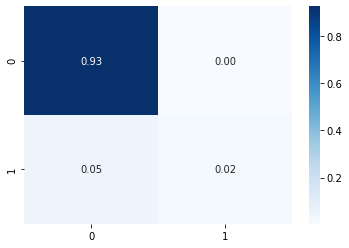

In [93]:
import seaborn as sns
sns.heatmap(ytest_tfidf_vector_confusion_matrix/np.sum(ytest_tfidf_vector_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Passive Agressive Classifier

# Using Count Vectorizer

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [36]:
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(xtrain_bow,ytrain_bow)

PassiveAggressiveClassifier(max_iter=50)

In [37]:
pred_y_count=passive.predict(xtest_bow)

In [38]:
from sklearn import metrics
accuracy_score=metrics.accuracy_score(ytest_bow,pred_y_count)
print(accuracy_score*100)

94.86938839355545


In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
print(classification_report(ytest_bow,pred_y_count))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.63      0.65      0.64       443

    accuracy                           0.95      6393
   macro avg       0.80      0.81      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [41]:
ytest_passive_confusion_matrix=metrics.confusion_matrix(ytest_bow,pred_y_count)

In [42]:
print(ytest_passive_confusion_matrix)

[[5779  171]
 [ 157  286]]


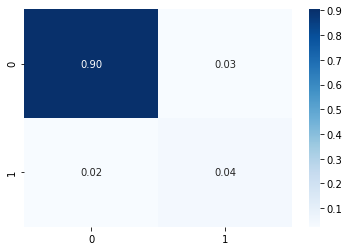

In [43]:
import seaborn as sns
sns.heatmap(ytest_passive_confusion_matrix/np.sum(ytest_passive_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Using TFIDF Vectorizer

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [45]:
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(xtrain_tdif,ytrain_tdif)

PassiveAggressiveClassifier(max_iter=50)

In [46]:
pred_y=passive.predict(xtest_tdif)

In [47]:
from sklearn import metrics
accuracy_score=metrics.accuracy_score(ytest_tdif,pred_y)
print(accuracy_score*100)

95.51071484436102


In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(classification_report(ytest_tdif,pred_y))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5950
           1       0.69      0.63      0.66       443

    accuracy                           0.96      6393
   macro avg       0.83      0.80      0.82      6393
weighted avg       0.95      0.96      0.95      6393



In [50]:
ytest_passive_confusion_matrix=metrics.confusion_matrix(ytest_tdif,pred_y)

In [51]:
print(ytest_passive_confusion_matrix)

[[5828  122]
 [ 165  278]]


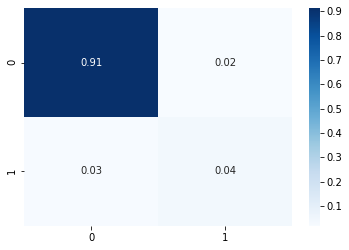

In [52]:
import seaborn as sns
sns.heatmap(ytest_passive_confusion_matrix/np.sum(ytest_passive_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Decision Tree Classifier

# By using Countvectorizer

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dmodel=DecisionTreeClassifier()

In [ ]:
dmodel.fit(xtrain_bow,ytrain_bow)

In [ ]:
ytest_decsion_bow_pred=dmodel.predict(xtest_bow)

In [ ]:
from sklearn import metrics

In [ ]:
ytest_decision_bow_score=metrics.accuracy_score(ytest_bow,ytest_decison_bow_pred)

In [ ]:
print(ytest_decision_bow_score*100)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(ytest_bow,ytest_decision_bow_pred))

In [ ]:
ytest_decision_bow_confusion_matrix=metrics.confusion_matrix(ytest_bow,ytest_decision_bow_pred)

In [ ]:
print(ytest_decision_bow_confusion_matrix)

In [ ]:
sns.heatmap(ytest_decision_bow_confusion_matrix/np.sum(ytest_decision_bow_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')